In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as slv

$$
x' = \frac{rx^2}{1+x} - x -x^2
$$

1. Первый предельный случай
$$ x \to 0 $$

$$
x' = (r-1)x^2 - x
$$

$$ 
\overline{x}_1 = 0 \\ 
\overline{x}_2 = \frac{1}{r-1} 
$$

**Условие устойчивого стационара**
$$
dx/dt = F(x) \\ 
F(\overline{x}) = 0 \\
\frac{dF}{dx}(\overline{x}) < 0
$$

$$ F'(\overline{x}_1) < 0; \;\;\; F'(\overline{x}_2) > 0; $$

r > 1: популяция с нижней критической границей;  
r < 1: популяция вымирает всегда;

2. Второй предельный случай: $ x \to \infty $

# Phase-parametric analysis

$$
0 = \frac{rx^2}{1+x} - x -x^2
$$

$$ \frac{ (x + x^2) (1+x) } {x^2} = r \\
r = \frac{(1+x)^2}{x}
$$

(-1.0, 5.0)

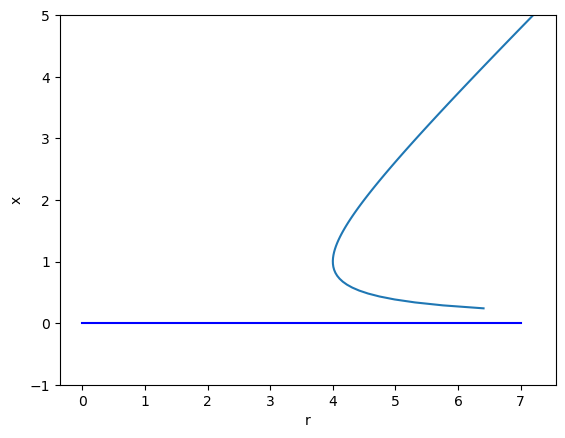

In [52]:
xx = np.linspace(0.24,5,100)
rlam = lambda x: (1+x)**2/x
plt.plot(rlam(xx), xx)
plt.xlabel('r')
plt.ylabel('x')
plt.plot([0,7],[0,0], '-b')
plt.ylim(-1,5)

# Quiver usage

In [24]:
r = 3; K = 1.2;
fu = lambda x,y: r*x*(1-np.log(x)/np.log(K)) - y*x**2
pu = lambda x,y: x*0

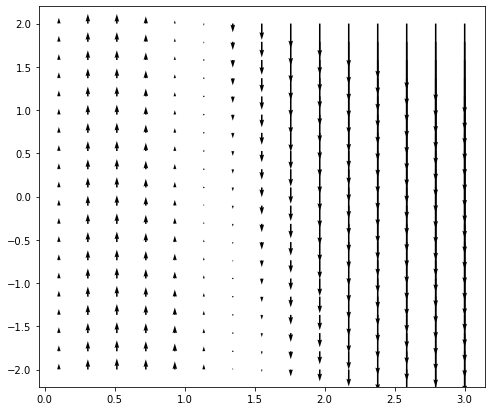

In [27]:
plt.figure(figsize=(8,7))
xx = np.linspace(0.1,3,15)
yy = np.linspace(-2,2,20)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, pu(Xm,Ym), fu(Xm,Ym), scale_units='xy', angles='xy', scale=60)

# Discrete systems

$$ X_{n+1} = X_n / 2 - X_n^2 / 5 $$
$$ X_{n+1} = X_n + X_{n-1} / 2 $$

General view:

$$ X_{n+1} = F(X_n) $$

Immobile point:
$$ X^{*}: X^{*} = F(X^{*}) $$

$$ \left| \frac{dF}{dX} (X^{*}) \right| < 1 $$

$$ X_{n+1} = \frac{r X_n}{1 + X_n / M} $$

(0.0, 25.0)

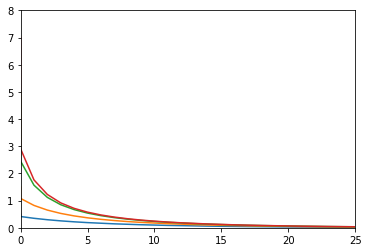

In [40]:
x0 = 12.5
r = 0.9
M = 6.0
# M*(r-1) = 6*0.5 = 3  x(r-1)
fu = lambda x,r,M: r*x/(1+x/M)

for x0 in [0.5, 1.5, 5, 7]:
    xn = [x0]
    tt = [0]

    for i in range(200):
        tt.append(i)
        xn.append(fu(xn[-1], r, M))

    plt.plot(tt, xn)
plt.ylim(0,8)
plt.xlim(0, 25)

$$ dF/dx = M^2r/ (M+x)^2 $$

$$ F'(0) = r $$

When $ r>1$ - 0 is instable. When $ r < 1 $ - 0 is stable.

$$ X^{*} = M (r-1) $$ 

$$ F'(X^{*}) = \frac{M^2r }{(M + M(r-1))^2} $$

$$ F'(X^{*}) = \frac{ 1 }{ r } $$

$$ F'(0) = r $$

When $ r>1$ - X is stable. When $ r < 1 $ - X is instable.

# Sample code blocks for symbolics

In [33]:
import sympy as sm

In [34]:
x,r,M = sm.symbols('x,r,M')

In [35]:
FU = r*x/(1+x/M)

In [38]:
sm.solve(FU-x)

[{M: x/(r - 1)}, {x: 0}]

TypeError: 'Mul' object is not callable

In [35]:
from sympy.utilities.lambdify import lambdify
func = lambdify([x,r], FU,'numpy') #
func(np.linspace(0,2,10), 5)

array([ 0.        , -0.06958474,  0.04178538,  0.22222222,  0.41249092,
        0.5782976 ,  0.6984127 ,  0.75899087,  0.75061728,  0.66666667])